In [1]:
import os
import xarray
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from datetime import datetime

from mhw_analysis.systems import io as mhw_sys_io

import pandas

from IPython import embed
from dateutil.relativedelta import relativedelta
import scipy.stats
from statsmodels.stats.weightstats import ztest as ztest

In [32]:
mask=xarray.open_dataset('MHWS_2019_mask.nc',engine='h5netcdf')
mask_date = mask.sel(time=['2015-7-13'], lat=slice(-80.2,90))
mask_date

<xarray.Dataset>
Dimensions:  (lat: 681, lon: 1440, time: 1)
Coordinates:
  * lat      (lat) float64 -80.12 -79.88 -79.62 -79.38 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 2015-07-13
Data variables:
    mask     (lat, lon, time) int32 ...

mask_date

m=np.roll(mask.lon, 180)

In [27]:
mask_date
lon=mask_date.lon
size=(np.size(lon))/2

In [33]:
mask1=np.roll(lon, size, axis=0.125)

TypeError: 'float' object is not iterable

In [36]:
mask_date.coords['lon'] = (mask_date.coords['lon'] + 180) % 360 - 180
mask_date = mask_date.sortby(mask_date.lon)

In [37]:
mask_date

<xarray.Dataset>
Dimensions:  (lat: 681, lon: 1440, time: 1)
Coordinates:
  * lat      (lat) float64 -80.12 -79.88 -79.62 -79.38 ... 89.38 89.62 89.88
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2015-07-13
Data variables:
    mask     (lat, lon, time) int32 ...

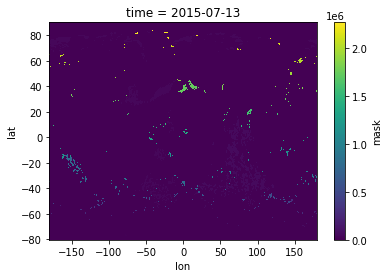

In [39]:
mask_date.mask.plot()

In [41]:
bl=xarray.open_dataset("CHL_baseline_1993-2020.nc")
bls=bl.seasonalT
bls1=bls.sel(doy=[164])

In [ ]:
m

In [21]:
bls1


<xarray.DataArray 'seasonalT' (doy: 1, latitude: 681, longitude: 1440)>
[980640 values with dtype=float32]
Coordinates:
  * doy        (doy) int64 164
  * latitude   (latitude) float32 -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8

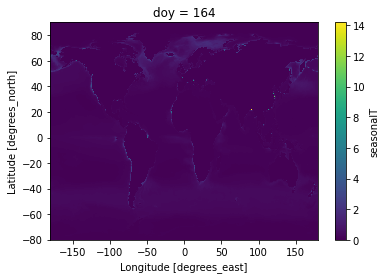

In [42]:
bls1.plot()

# 